In [194]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, time

In [182]:
df_lung_gene = pd.read_csv("LUNG_Gene_Expression.txt", delimiter="\t")
column_names = df_lung_gene.columns.values.tolist()
column_names.append("")
df_lung_gene.columns = column_names[1:]
df_lung_gene = df_lung_gene.iloc[:, :-1]

df_methy_exp = pd.read_csv("LUNG_Methy_Expression.txt", delimiter="\t")
column_names = df_methy_exp.columns.values.tolist()
column_names.append("")
df_methy_exp.columns = column_names[1:]
df_methy_exp = df_methy_exp.iloc[:, :-1]

df_lung_mirna = pd.read_csv("LUNG_Mirna_Expression.txt", delimiter="\t")
column_names = df_lung_mirna.columns.values.tolist()
column_names.append("")
df_lung_mirna.columns = column_names[1:]
df_lung_mirna = df_lung_mirna.iloc[:, :-1]


Create correlation matrices

In [196]:
matrix_lung_gene = df_lung_gene.corr(method='spearman')
matrix_lung_methy = df_methy_exp.corr(method='spearman')
matrix_lung_mirna = df_lung_mirna.corr(method='spearman')

In [195]:
def matrix_heatmap(df):
    plt.figure(figsize=(16, 12))

    # Create a custom diverging palette
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

    lower_tri = df.where(np.tril(np.ones(matrix_lung_gene.shape),k=1).astype(bool))

    _ = sns.heatmap(lower_tri, center=0,
                fmt='.2f', square=True, cmap=cmap)


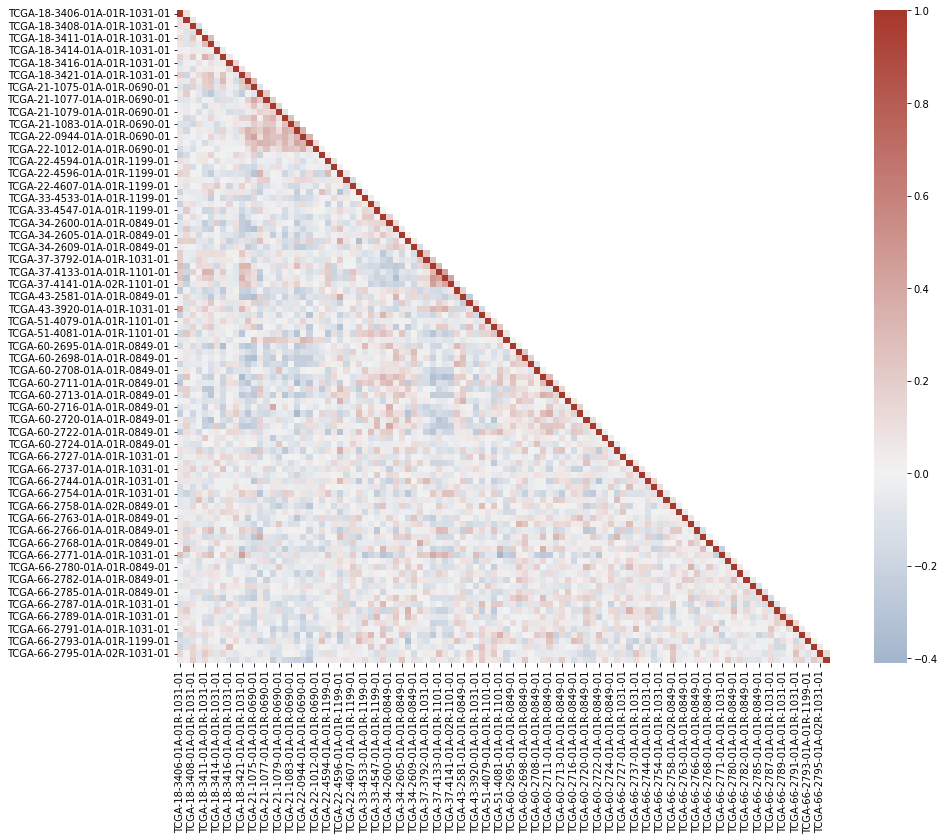

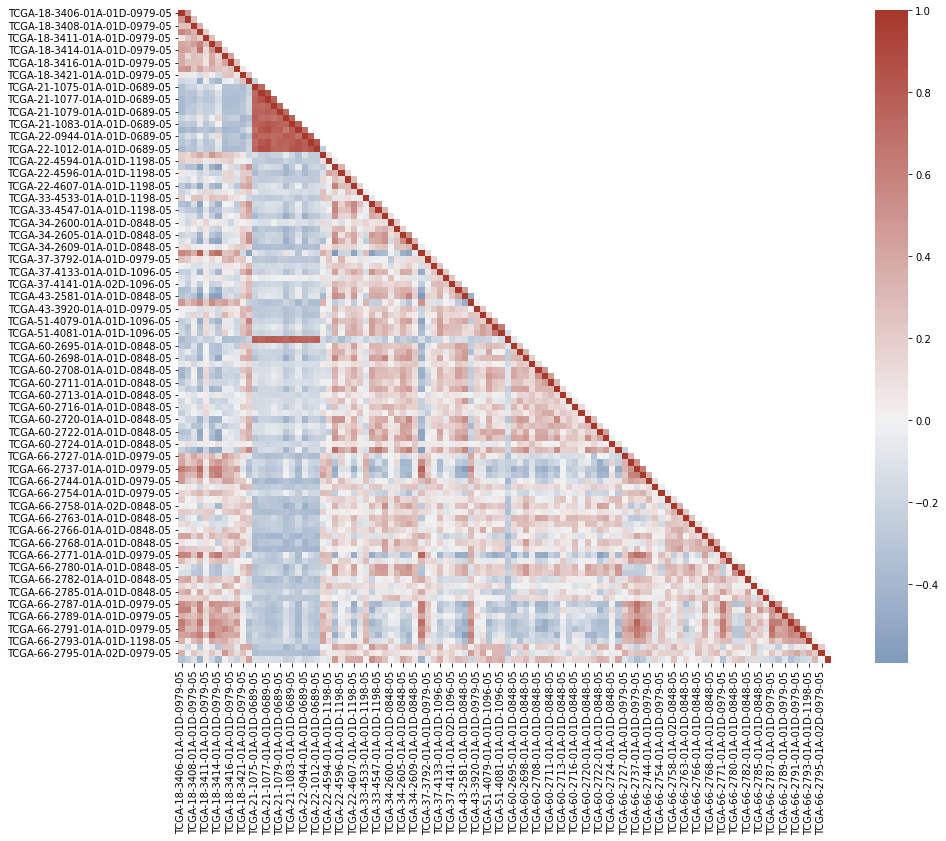

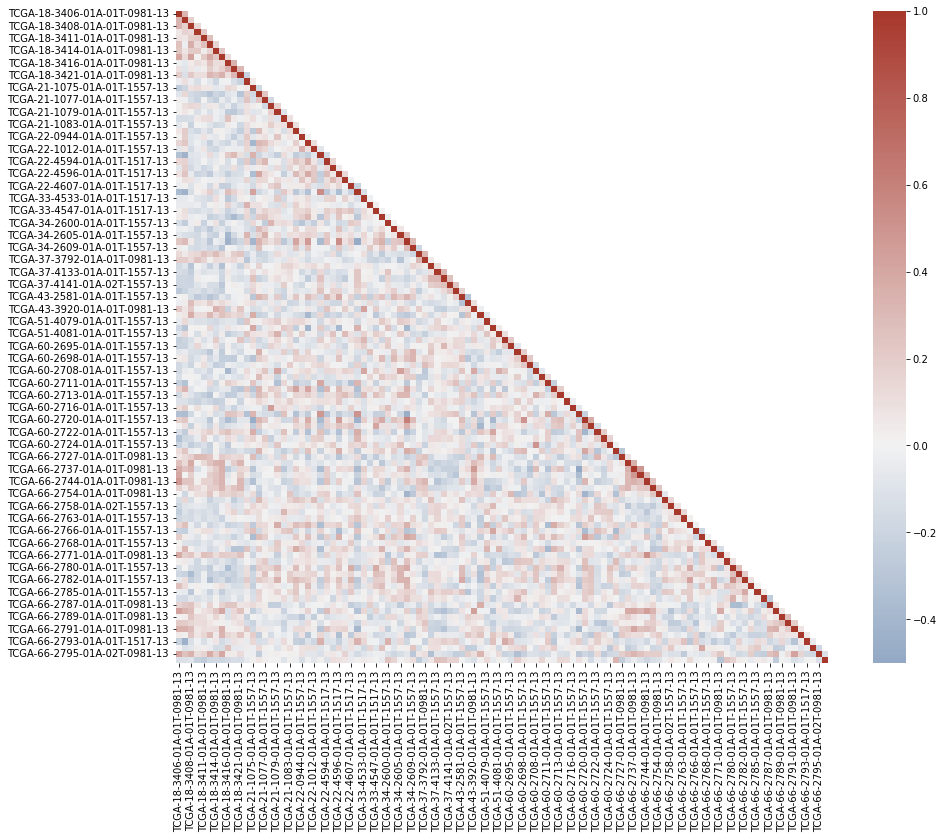

In [197]:
matrix_heatmap(matrix_lung_gene)
matrix_heatmap(matrix_lung_methy)
matrix_heatmap(matrix_lung_mirna)

Build the Patient similarity networks for each datatype. Use a weighted network where each edge is weighted by the correlation between its two nodes. In the correlation matrix, we compute all pairs of patients. We can define a threshold for which a connection can be considered. Two patients (i,j) are connected in the graph: if |corr(i,j)| >= X. Thus, in the graph only edges corresponding to a correlation greater than X are considered.

Hint: use the NetworkX package.



In [198]:
import matplotlib.pyplot as plt
import networkx as nx

def generate_network(matrix,threshold=0):
    values = matrix.values
    header = matrix.columns.values.tolist()
    G_ = nx.Graph()
    for i in range(len(header)):
        for j in range(i):
            if values[i][j] > threshold:
                G_.add_edge(header[i], header[j], weight=values[i][j])
    return G_

def print_graph(G):
    edges = [(u, v) for (u, v, d) in G.edges(data=True)]
    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=7)
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=0.1)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.show()

Gerar e imprimir grafos

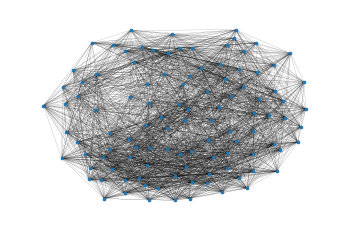

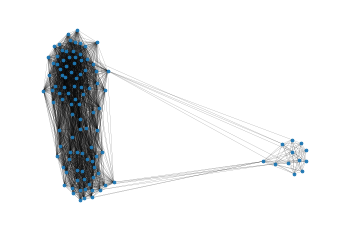

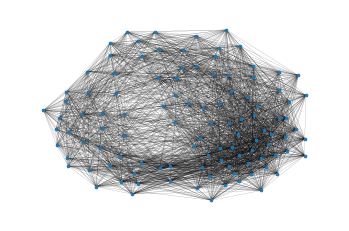

In [184]:
G_lung = generate_network(matrix_lung_gene)
print_graph(G_lung)
G_methy = generate_network(matrix_lung_methy)
print_graph(G_methy)
G_mirna = generate_network(matrix_lung_mirna)
print_graph(G_mirna)

nx.write_gexf(G_lung, "./lung_gene.gexf")
nx.write_gexf(G_methy, "./lung_methy.gexf")
nx.write_gexf(G_mirna, "./lung_mirna.gexf")



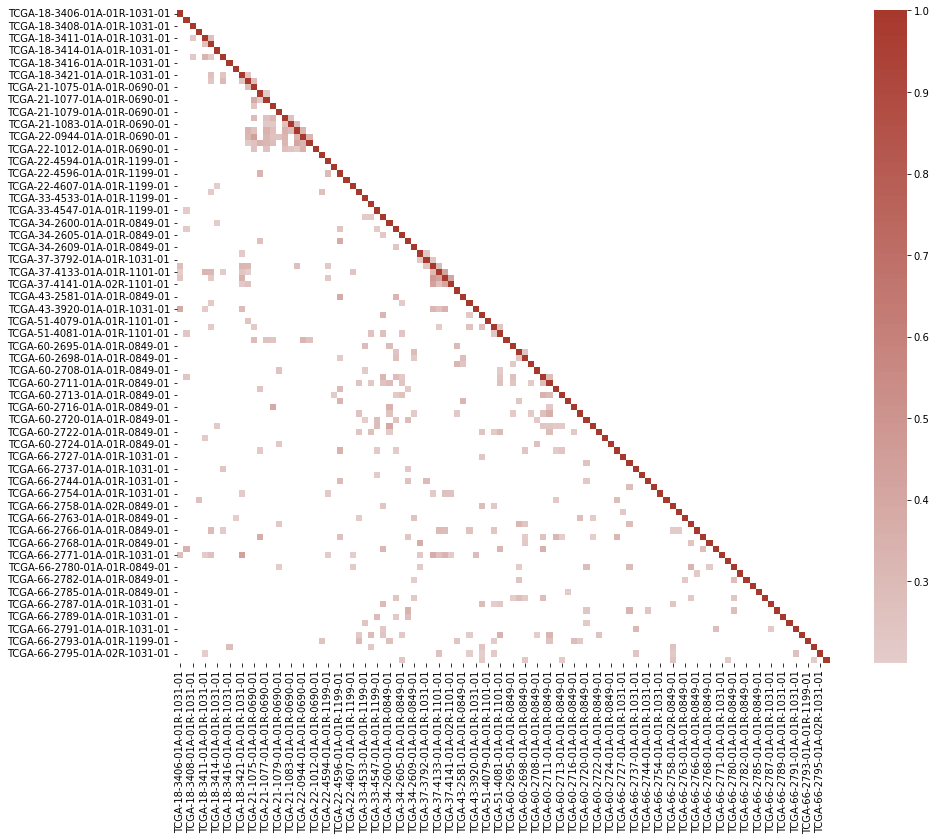

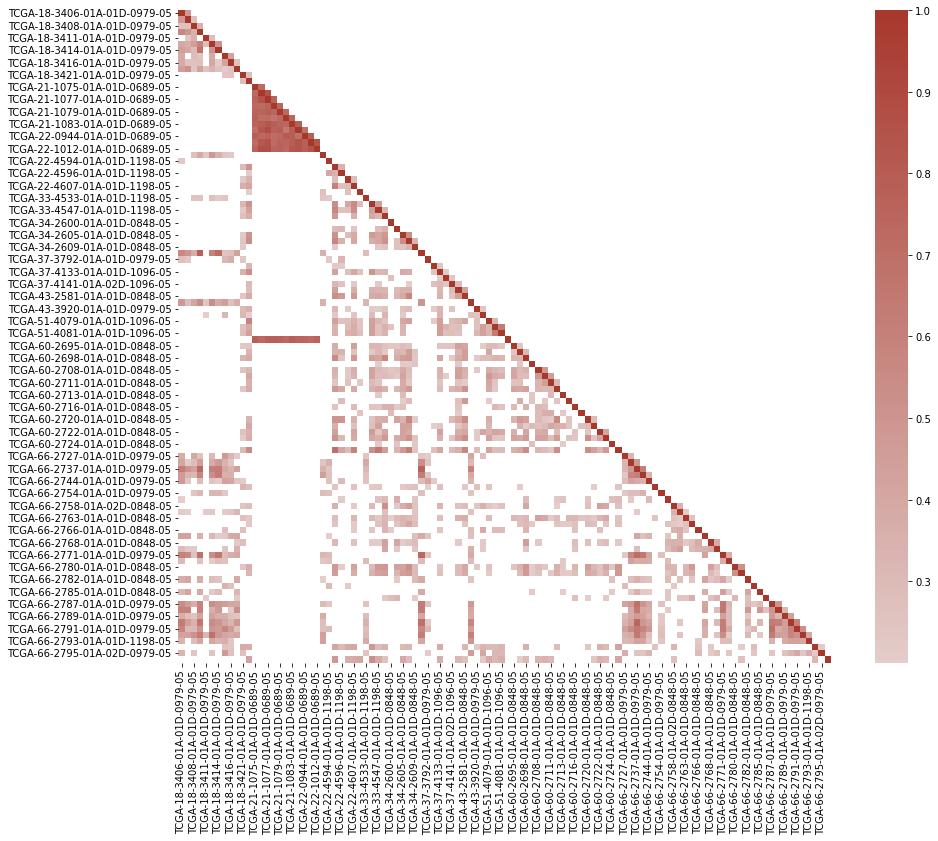

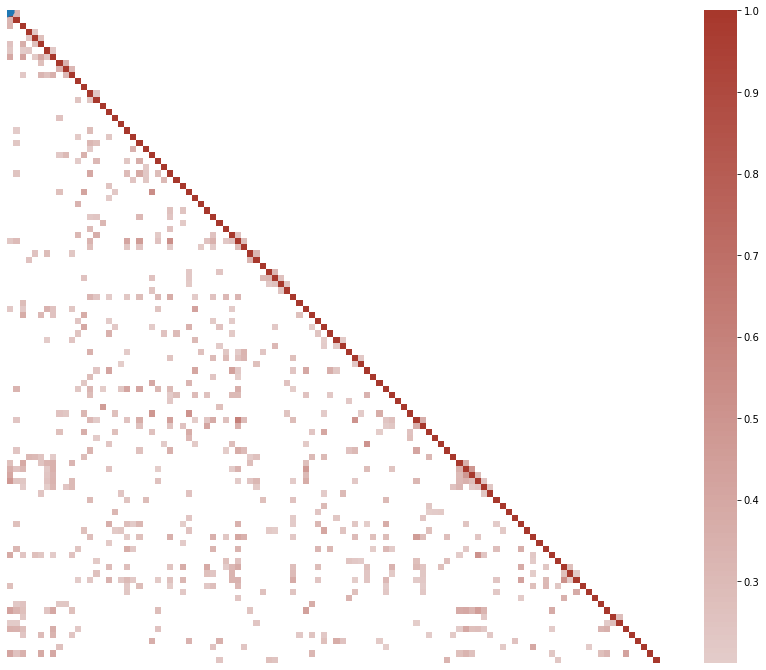

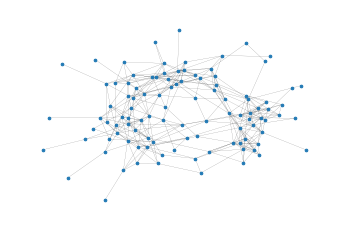

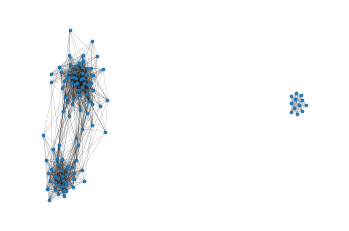

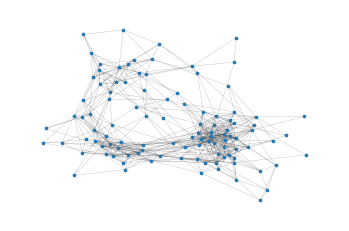

In [199]:
matrices =[matrix_lung_gene,matrix_lung_methy,matrix_lung_mirna]

#matrix_lung_gene
def filter_matrix(df,threshold):
    return df[df > threshold]

matrix_heatmap(filter_matrix(matrix_lung_gene,0.2))
matrix_heatmap(filter_matrix(matrix_lung_methy,0.2))
matrix_heatmap(filter_matrix(matrix_lung_mirna,0.2))
time.sleep(0.1)
G_lung_ = generate_network(matrix_lung_gene[matrix_lung_gene > 0.2])
print_graph(G_lung_)

G_lung_ = generate_network(filter_matrix(matrix_lung_gene,0.2))
print_graph(G_lung_)

G_methy = generate_network(filter_matrix(matrix_lung_methy,0.2))
print_graph(G_methy)

G_mirna = generate_network(filter_matrix(matrix_lung_mirna,0.2))
print_graph(G_mirna)


